In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('Train_Dataset.csv')
test = pd.read_csv('Test_Dataset.csv')

In [3]:
train = train.iloc[:5180,:]
train.head()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [4]:
train['Data'] = 'train'
test['Data'] = 'test'

In [5]:
print(train.shape)
print(test.shape)

(5180, 23)
(2630, 22)


In [6]:
attrition = pd.concat([train,test])
attrition.tail()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,Data
2625,6112626.0,NaN,46.0,Rarely,Sales,12.0,Marketing Diploma,Male,76.0,3.0,...,1.0,5.0,1.0,18.0,10.0,1.0,3.0,Married,26761.0,test
2626,6112627.0,NaN,29.0,Rarely,Analytics,22.0,CA,Male,80.0,4.0,...,0.0,2.0,0.0,18.0,7.0,4.0,4.0,Divorsed,19196.0,test
2627,6112628.0,NaN,44.0,Rarely,Analytics,8.0,CA,F,42.0,4.0,...,1.0,3.0,0.0,19.0,24.0,5.0,17.0,Married,25248.0,test
2628,6112629.0,NaN,NaN,Rarely,Analytics,11.0,Statistics,Female,NaN,4.0,...,0.0,2.0,0.0,18.0,2.0,1.0,1.0,Single,17261.0,test
2629,6112630.0,NaN,50.0,Yes,Analytics,1.0,Statistics,F,73.0,3.0,...,1.0,3.0,1.0,24.0,28.0,0.0,7.0,Married,33172.0,test


In [7]:
attrition.shape

(7810, 23)

In [8]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7810 entries, 0 to 2629
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          7810 non-null   float64
 1   Attrition           5180 non-null   float64
 2   Age                 7352 non-null   float64
 3   TravelProfile       7810 non-null   object 
 4   Department          7628 non-null   object 
 5   HomeToWork          7429 non-null   float64
 6   EducationField      7810 non-null   object 
 7   Gender              7734 non-null   object 
 8   HourlnWeek          7387 non-null   float64
 9   Involvement         7810 non-null   float64
 10  WorkLifeBalance     7810 non-null   float64
 11  Designation         7742 non-null   object 
 12  JobSatisfaction     7810 non-null   float64
 13  ESOPs               7810 non-null   float64
 14  NumCompaniesWorked  7810 non-null   float64
 15  OverTime            7810 non-null   float64
 16  SalaryHikel

In [9]:
attrition.isnull().sum()/len(attrition)*100

EmployeeID             0.000000
Attrition             33.674776
Age                    5.864277
TravelProfile          0.000000
Department             2.330346
HomeToWork             4.878361
EducationField         0.000000
Gender                 0.973111
HourlnWeek             5.416133
Involvement            0.000000
WorkLifeBalance        0.000000
Designation            0.870679
JobSatisfaction        0.000000
ESOPs                  0.000000
NumCompaniesWorked     0.000000
OverTime               0.000000
SalaryHikelastYear     3.367478
WorkExperience         3.956466
LastPromotion          1.626120
CurrentProfile         5.697823
MaritalStatus          0.000000
MonthlyIncome          1.613316
Data                   0.000000
dtype: float64

In [10]:
attrition['Department'] = attrition['Department'].fillna(attrition['Department'].mode()[0])
attrition['Gender'] = attrition['Gender'].fillna(attrition['Gender'].mode()[0])
attrition['Designation'] = attrition['Designation'].fillna(attrition['Designation'].mode()[0])

In [11]:
attrition.describe()

,EmployeeID,Attrition,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome
count,7.810000e+03,5180.000000,7352.000000,7429.000000,7387.000000,7810.000000,7810.000000,7810.000000,7810.000000,7810.000000,7810.000000,7547.000000,7501.000000,7683.000000,7365.000000,7684.000000
mean,5.448909e+06,0.278958,37.215860,11.215507,57.940436,3.230986,3.031754,3.134699,0.495391,3.179385,0.319078,20.645157,11.286095,2.589093,4.426477,21736.822098
std,4.720273e+05,0.448530,9.286258,8.590705,13.076675,0.876355,1.412770,1.341073,0.500011,2.625605,0.466149,3.712639,7.910095,3.257934,3.606972,4881.903674
min,5.110001e+06,0.000000,18.000000,1.000000,10.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1000.000000
25%,5.111953e+06,0.000000,30.000000,5.000000,49.000000,3.000000,2.000000,2.000000,0.000000,1.000000,0.000000,18.000000,6.000000,1.000000,2.000000,18377.000000
50%,5.113906e+06,0.000000,36.000000,9.000000,59.000000,3.000000,3.000000,3.000000,0.000000,2.000000,0.000000,20.000000,10.000000,1.000000,3.000000,20229.000000
75%,6.110678e+06,1.000000,43.000000,16.000000,67.000000,4.000000,4.000000,4.000000,1.000000,5.000000,1.000000,23.000000,15.000000,3.000000,7.000000,23465.750000
max,6.112630e+06,1.000000,61.000000,123.000000,110.000000,5.000000,5.000000,5.000000,1.000000,21.000000,1.000000,31.000000,41.000000,16.000000,18.000000,96000.000000


In [12]:
numeric_cols = ['Age', 'HomeToWork', 'HourlnWeek', 'SalaryHikelastYear', 'WorkExperience', 'LastPromotion', 'CurrentProfile', 'MonthlyIncome']
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
attrition[numeric_cols] = imputer.fit_transform(attrition[numeric_cols])

In [13]:
attrition.isnull().sum()/len(attrition)*100

EmployeeID             0.000000
Attrition             33.674776
Age                    0.000000
TravelProfile          0.000000
Department             0.000000
HomeToWork             0.000000
EducationField         0.000000
Gender                 0.000000
HourlnWeek             0.000000
Involvement            0.000000
WorkLifeBalance        0.000000
Designation            0.000000
JobSatisfaction        0.000000
ESOPs                  0.000000
NumCompaniesWorked     0.000000
OverTime               0.000000
SalaryHikelastYear     0.000000
WorkExperience         0.000000
LastPromotion          0.000000
CurrentProfile         0.000000
MaritalStatus          0.000000
MonthlyIncome          0.000000
Data                   0.000000
dtype: float64

In [14]:
for i in attrition.select_dtypes(exclude=['float64']).columns:
    print (attrition[i].value_counts())
    print ('-'*50)

TravelProfile
Rarely    5489
Yes       1580
No         741
Name: count, dtype: int64
--------------------------------------------------
Department
Analytics    5076
Sales        2407
Marketing     327
Name: count, dtype: int64
--------------------------------------------------
EducationField
Statistics           3169
CA                   2417
Marketing Diploma     894
Engineer              750
Other                 429
MBA                   151
Name: count, dtype: int64
--------------------------------------------------
Gender
Male      4744
Female    2020
F         1046
Name: count, dtype: int64
--------------------------------------------------
Designation
Executive         3133
Manager           2676
Senior Manager    1154
AVP                507
VP                 340
Name: count, dtype: int64
--------------------------------------------------
MaritalStatus
Single      2709
Married     2455
Divorsed    1493
M           1153
Name: count, dtype: int64
---------------------------------

In [15]:
attrition['Gender'] = attrition['Gender'].replace('F', 'Female')
attrition['MaritalStatus'] = attrition['MaritalStatus'].replace({'M': 'Married', 'Divorsed': 'Divorced'})

In [16]:
attrition.to_csv("Cleaned_data.csv", index=False)

In [17]:
df = pd.get_dummies (attrition, columns=['TravelProfile', 'Department', 'EducationField', 'Gender', 'Designation', 'MaritalStatus'], drop_first=True)

In [18]:
for col in df.columns:
    if df[col].dtype==bool:
        df[col] = np.where(df[col], 1,0)

In [19]:
df.head()

,EmployeeID,Attrition,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,...,EducationField_Marketing Diploma,EducationField_Other,EducationField_Statistics,Gender_Male,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single
0,5110001.0,0.0,35.0,5.0,69.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,1,1,0,0,0,1,0
1,5110002.0,1.0,32.0,5.0,62.0,4.0,3.0,2.0,0.0,8.0,...,0,0,1,0,1,0,0,0,0,1
2,5110003.0,0.0,31.0,5.0,45.0,5.0,3.0,2.0,1.0,3.0,...,0,0,1,0,0,1,0,0,0,1
3,5110004.0,0.0,34.0,10.0,32.0,3.0,2.0,4.0,1.0,1.0,...,0,0,1,0,0,1,0,0,0,0
4,5110005.0,0.0,37.0,27.0,49.0,3.0,4.0,4.0,1.0,8.0,...,0,0,1,0,0,1,0,0,0,0


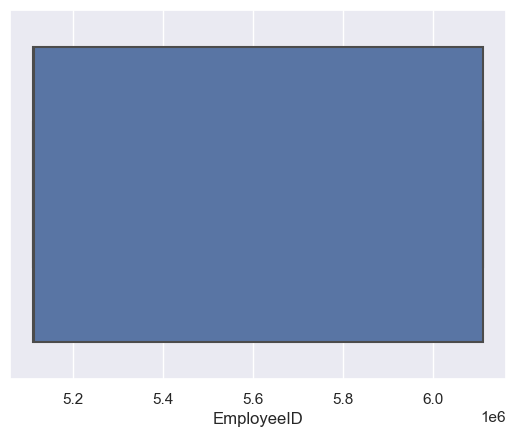

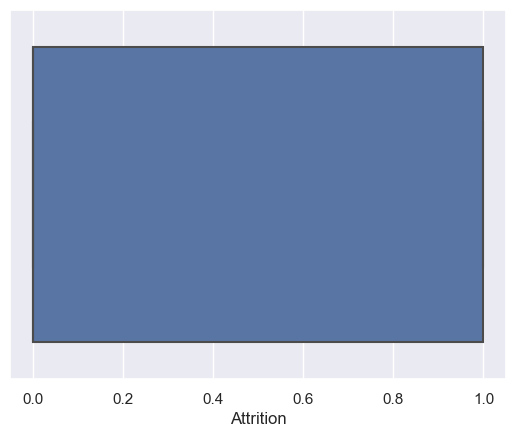

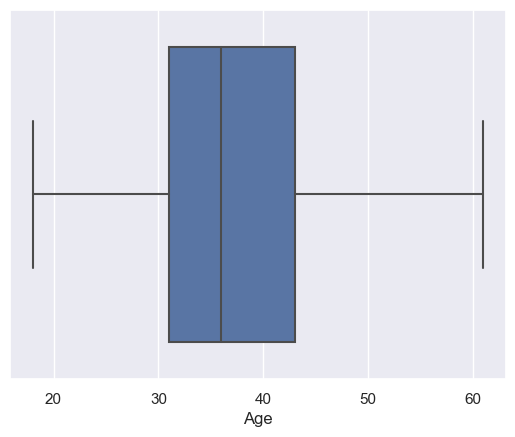

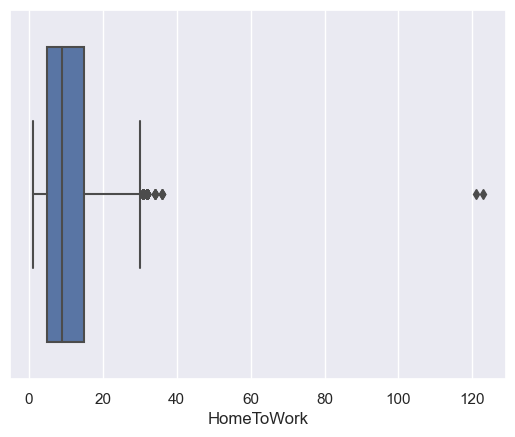

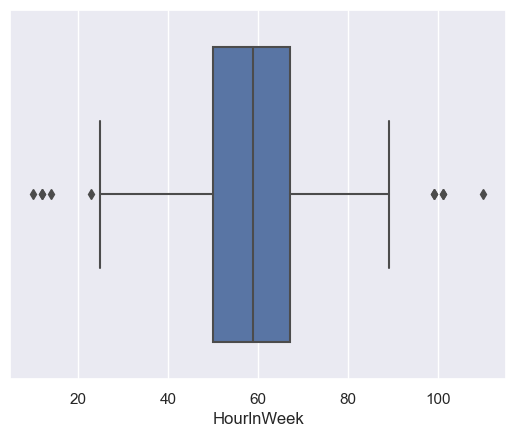

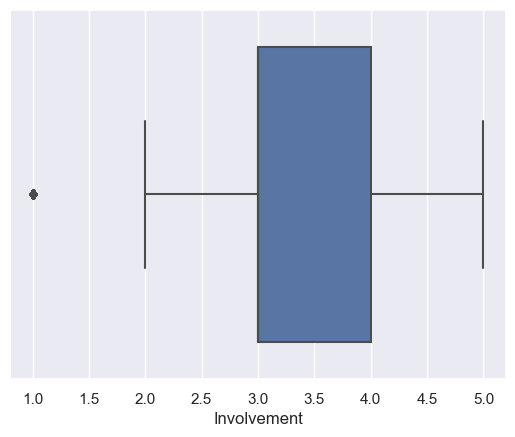

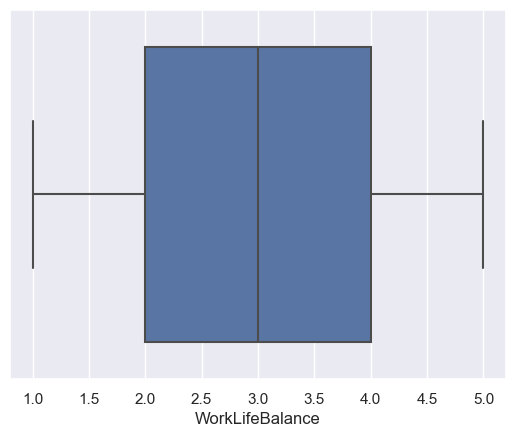

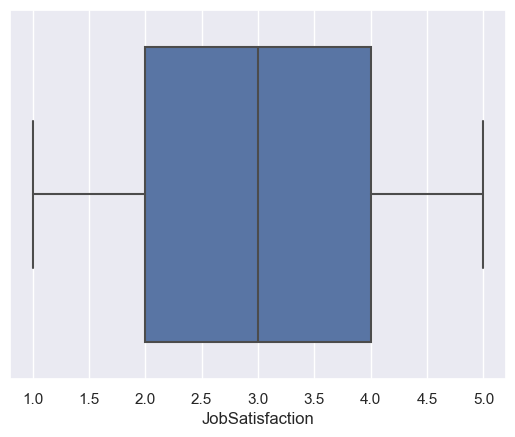

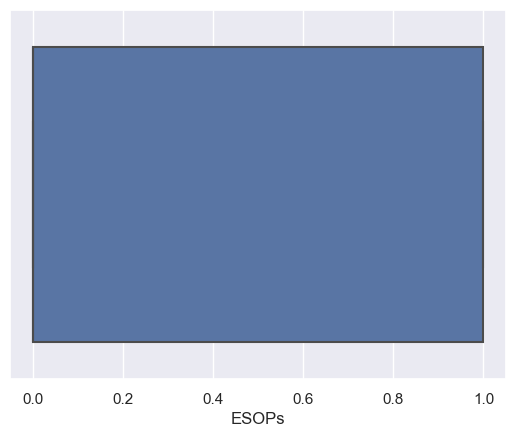

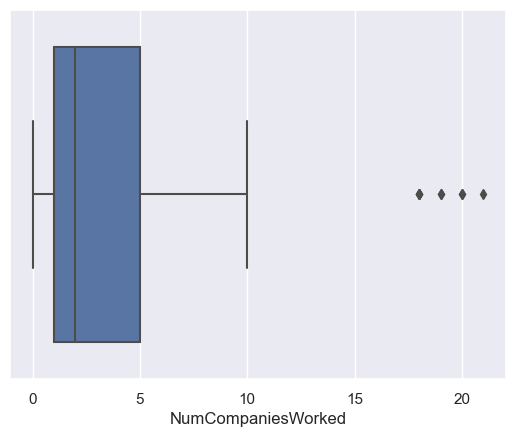

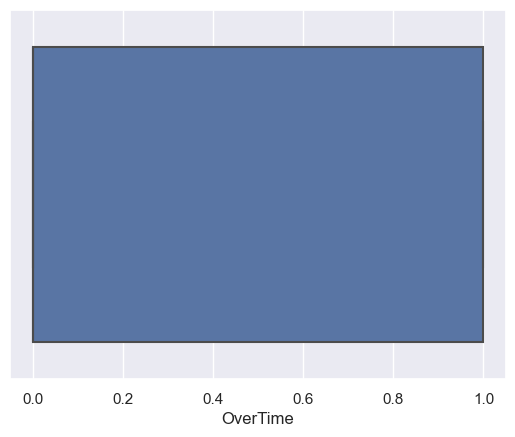

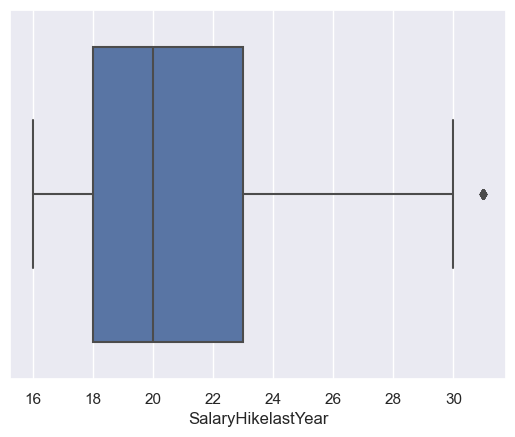

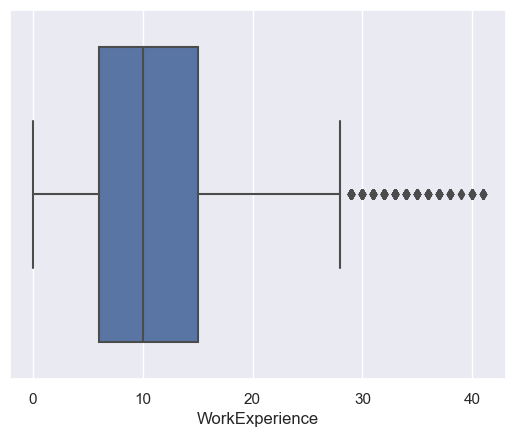

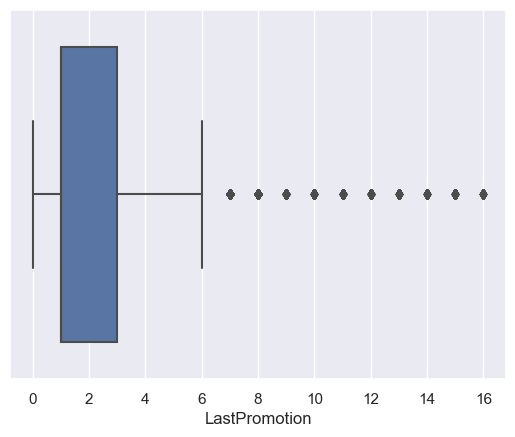

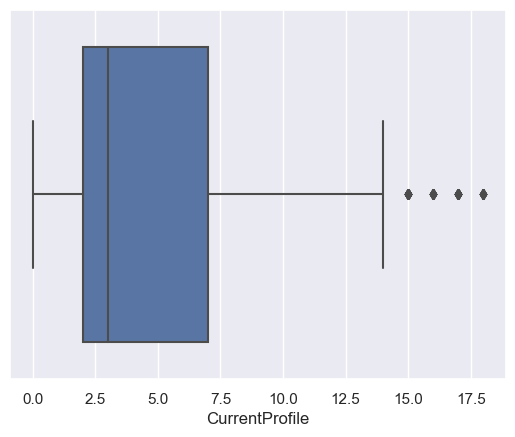

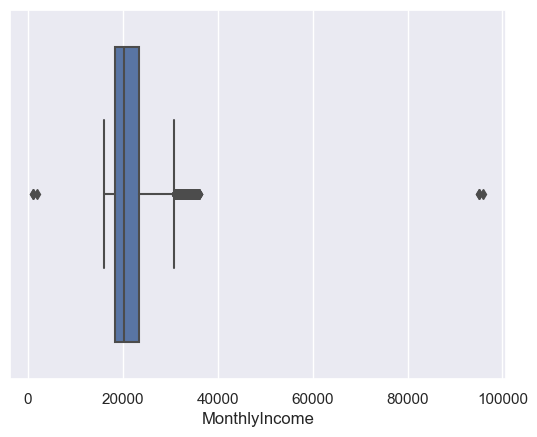

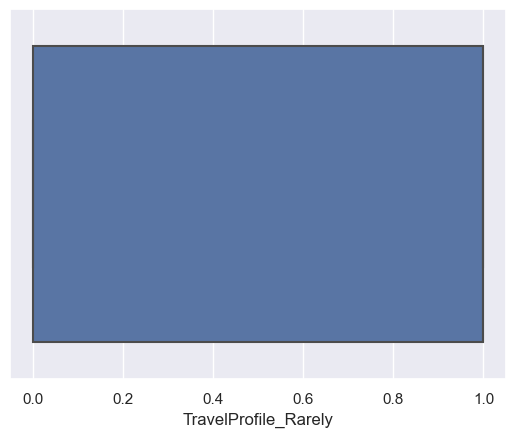

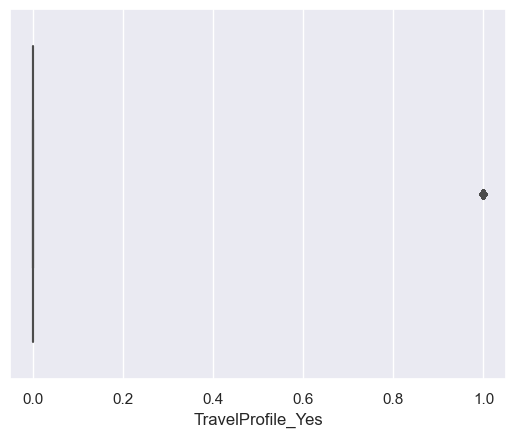

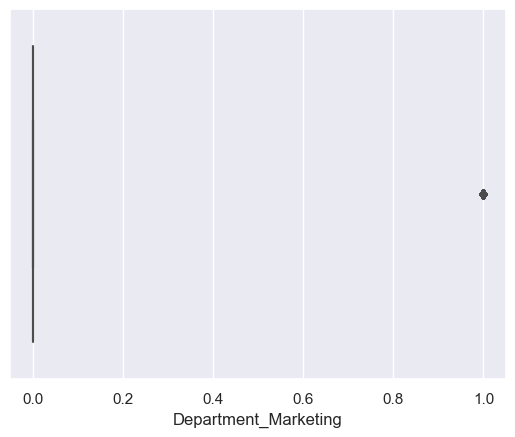

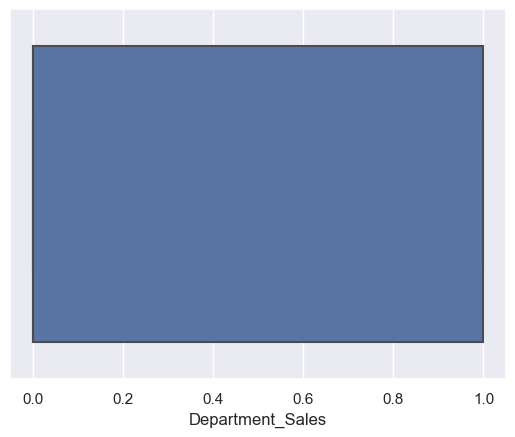

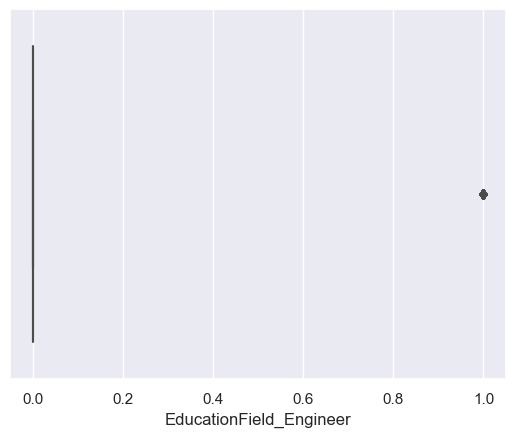

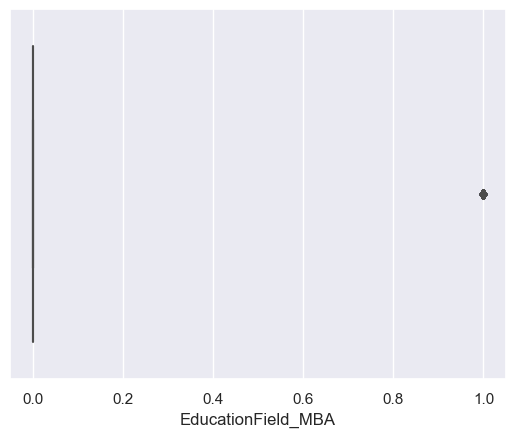

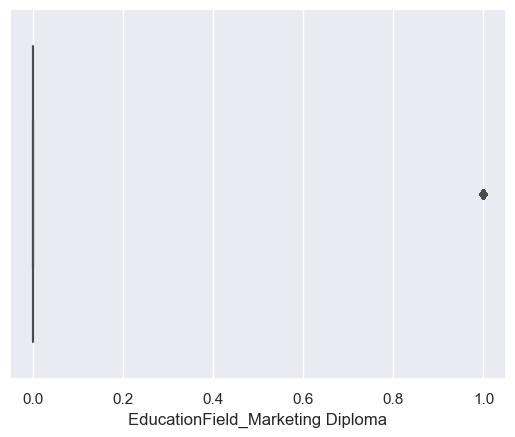

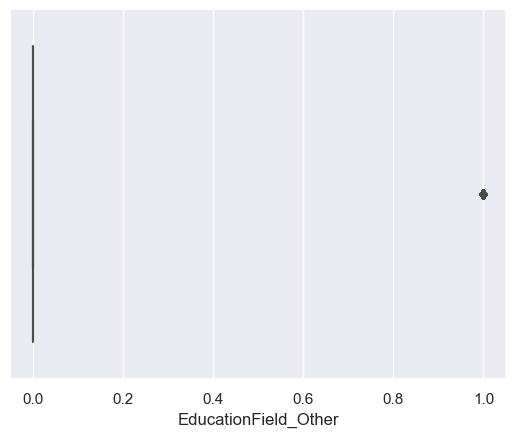

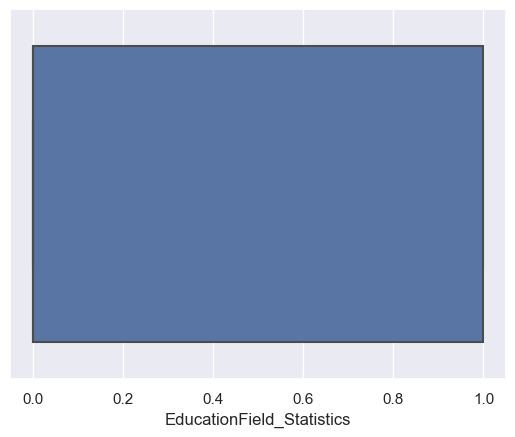

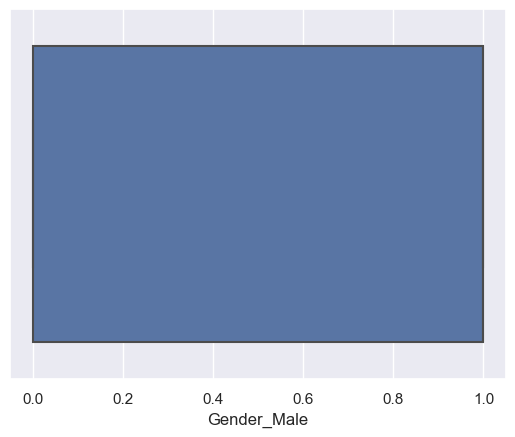

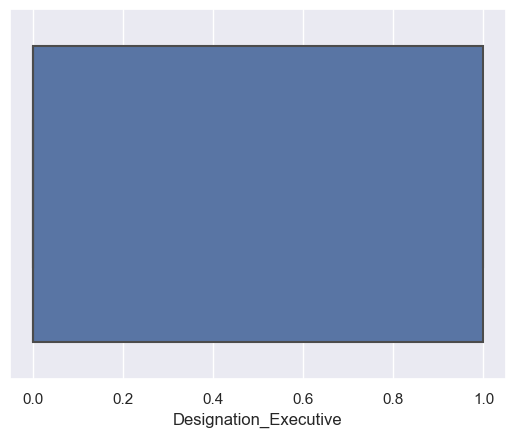

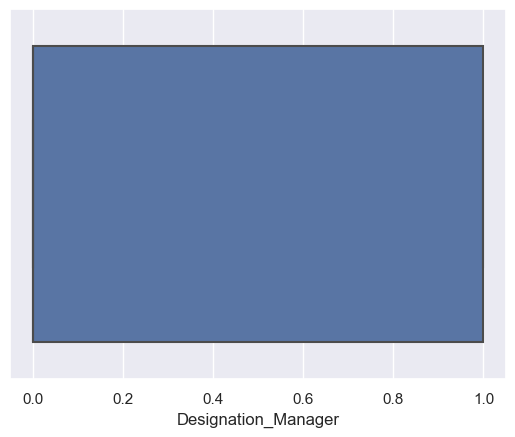

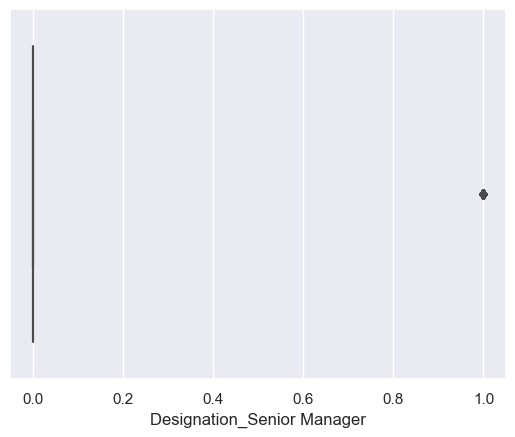

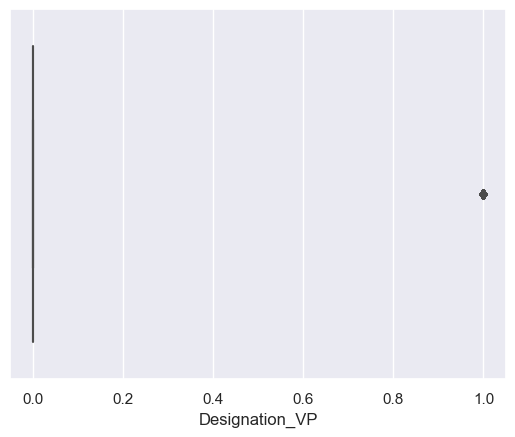

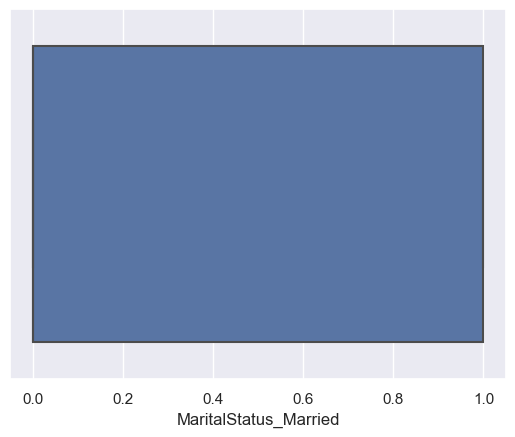

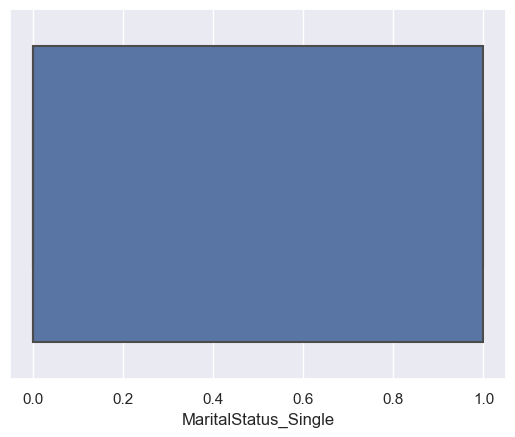

In [20]:
def boxplots (col):
    sns.boxplot(data=df, x =col)
    plt.show()
    
for i in list(df.select_dtypes(exclude=['object']).columns[0:]):
    boxplots(i)

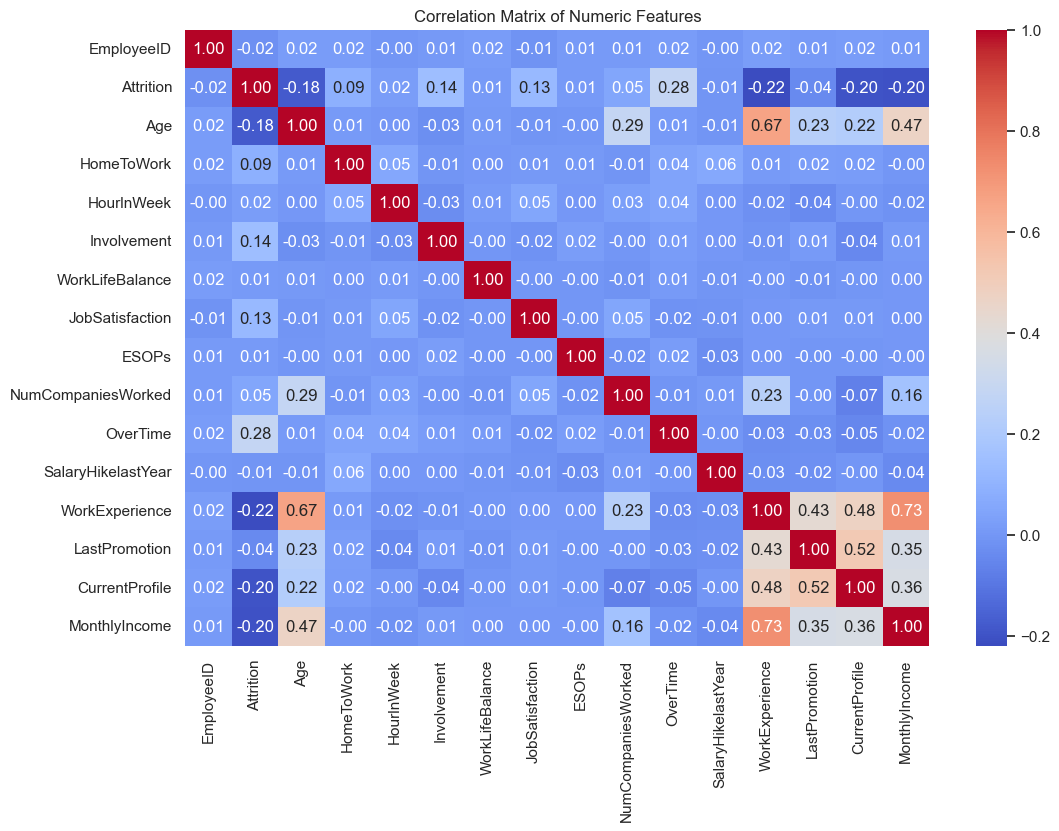

In [21]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [22]:
df_train = df[df['Data']=='train']
df_test = df[df['Data']=='test']

In [23]:
print (df_train.shape)
print (df_test.shape)

(5180, 33)
(2630, 33)


In [24]:
x = df_train.drop(['EmployeeID', 'Attrition', 'Data'], axis=1)
y = df_train['Attrition']

In [25]:
df_test.drop(['EmployeeID', 'Attrition', 'Data'], axis=1, inplace=True)

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtree1 = DecisionTreeClassifier(criterion='gini')
dtree1.fit (x_train, y_train)

dtree2 = DecisionTreeClassifier(criterion='entropy')
dtree2.fit (x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [28]:
dtree1_train_pred = dtree1.predict (x_train)
dtree1_test_pred = dtree1.predict (x_test)

dtree2_train_pred = dtree2.predict (x_train)
dtree2_test_pred = dtree2.predict (x_test)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [30]:
print (classification_report(y_train, dtree1_train_pred))
print (classification_report(y_test, dtree1_test_pred))
print ('-'*60)
print (classification_report(y_train, dtree2_train_pred))
print (classification_report(y_test, dtree2_test_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2988
         1.0       1.00      1.00      1.00      1156

    accuracy                           1.00      4144
   macro avg       1.00      1.00      1.00      4144
weighted avg       1.00      1.00      1.00      4144

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97       747
         1.0       0.90      0.97      0.93       289

    accuracy                           0.96      1036
   macro avg       0.94      0.96      0.95      1036
weighted avg       0.96      0.96      0.96      1036

------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2988
         1.0       1.00      1.00      1.00      1156

    accuracy                           1.00      4144
   macro avg       1.00      1.00      1.00      4144
weighted avg 

In [31]:
print (confusion_matrix(y_train, dtree1_train_pred))
print (confusion_matrix(y_test, dtree1_test_pred))
print ('-'*15)
print (confusion_matrix(y_train, dtree2_train_pred))
print (confusion_matrix(y_test, dtree2_test_pred))

[[2988    0]
 [   0 1156]]
[[715  32]
 [ 10 279]]
---------------
[[2988    0]
 [   0 1156]]
[[724  23]
 [ 12 277]]


In [32]:
print (accuracy_score(y_train, dtree1_train_pred))
print (accuracy_score(y_test, dtree1_test_pred))
print ('-'*20)
print (accuracy_score(y_train, dtree2_train_pred))
print (accuracy_score(y_test, dtree2_test_pred))

1.0
0.9594594594594594
--------------------
1.0
0.9662162162162162


In [33]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(dtree1, x_train, y_train, cv=10)
print (accuracy)
print (accuracy.mean())
print (accuracy.max())

[0.95662651 0.95421687 0.9253012  0.95662651 0.9468599  0.9468599
 0.95169082 0.92512077 0.96859903 0.92995169]
0.9461853209941212
0.9685990338164251


In [34]:
pred = dtree1.predict(df_test)
pred

array([1., 0., 0., ..., 0., 1., 0.])

In [35]:
print(len(pred))
print(len(test))

2630
2630


In [36]:
final_output_test = pd.concat([test['EmployeeID'], pd.DataFrame(pred)], axis=1)
final_output_test

,EmployeeID,0
0,6110001,1.0
1,6110002,0.0
2,6110003,0.0
3,6110004,1.0
4,6110005,0.0
...,...,...
2625,6112626,0.0
2626,6112627,0.0
2627,6112628,0.0
2628,6112629,1.0


In [37]:
final_output_test.to_csv("Emp_attrition.csv")